Univariate analysis of weather variables

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

In [2]:
df = pd.read_csv('weather_data.csv')

In [3]:
df.head(10) #first 10 rows of the dataset

,time,tempm,hum,wspdm,wdird,wdire,pressurem,vism,windchillm,fog,rain,snow,hail,thunder
0,2015-01-01 00:00:00,-12.0,85,5.6,0,Variable,1037,5.0,-15.5,0,0,0,0,0
1,2015-01-01 00:30:00,-11.0,85,3.7,0,Variable,1036,4.0,-999.0,0,0,0,0,0
2,2015-01-01 01:00:00,-10.0,86,3.7,0,Variable,1036,4.0,-999.0,0,0,0,0,0
3,2015-01-01 01:30:00,-10.0,86,0.0,0,North,1036,5.0,-999.0,0,0,0,0,0
4,2015-01-01 02:00:00,-9.0,79,0.0,0,North,1036,4.0,-999.0,0,0,0,0,0
5,2015-01-01 02:30:00,-8.0,79,3.7,0,Variable,1036,4.0,-999.0,0,0,0,0,0
6,2015-01-01 03:00:00,-7.0,74,9.3,230,SW,1036,5.0,-11.4,0,0,0,0,0
7,2015-01-01 03:30:00,-7.0,74,11.1,250,WSW,1036,6.0,-12.0,0,0,0,0,0
8,2015-01-01 04:00:00,-7.0,74,11.1,240,WSW,1035,6.0,-12.0,0,0,0,0,0
9,2015-01-01 04:30:00,-7.0,74,11.1,220,SW,1035,8.0,-12.0,0,0,0,0,0


In [4]:
df.tail(10) #last 10 rows  

,time,tempm,hum,wspdm,wdird,wdire,pressurem,vism,windchillm,fog,rain,snow,hail,thunder
7225,2015-05-31 19:00:00,22.0,50,3.7,0,Variable,1018,-9999.0,-999.0,0,0,0,0,0
7226,2015-05-31 19:30:00,21.0,53,9.3,160,SSE,1018,-9999.0,-999.0,0,0,0,0,0
7227,2015-05-31 20:00:00,20.0,56,5.6,0,Variable,1018,-9999.0,-999.0,0,0,0,0,0
7228,2015-05-31 20:30:00,17.0,77,3.7,0,Variable,1018,-9999.0,-999.0,0,0,0,0,0
7229,2015-05-31 21:00:00,18.0,64,3.7,0,Variable,1018,-9999.0,-999.0,0,0,0,0,0
7230,2015-05-31 21:30:00,16.0,77,3.7,0,Variable,1019,-9999.0,-999.0,0,0,0,0,0
7231,2015-05-31 22:00:00,14.0,88,3.7,0,Variable,1019,-9999.0,-999.0,0,0,0,0,0
7232,2015-05-31 22:30:00,14.0,88,3.7,0,Variable,1019,-9999.0,-999.0,0,0,0,0,0
7233,2015-05-31 23:00:00,15.0,82,3.7,0,Variable,1019,-9999.0,-999.0,0,0,0,0,0
7234,2015-05-31 23:30:00,13.0,94,1.9,0,Variable,1019,-9999.0,-999.0,0,0,0,0,0


In [5]:
df.shape

(7235, 14)

This table has 7235 rows and 14 columns

In [6]:
df.info() #information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7235 entries, 0 to 7234
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        7235 non-null   object 
 1   tempm       7235 non-null   float64
 2   hum         7235 non-null   int64  
 3   wspdm       7235 non-null   float64
 4   wdird       7235 non-null   int64  
 5   wdire       7235 non-null   object 
 6   pressurem   7235 non-null   int64  
 7   vism        7235 non-null   float64
 8   windchillm  7235 non-null   float64
 9   fog         7235 non-null   int64  
 10  rain        7235 non-null   int64  
 11  snow        7235 non-null   int64  
 12  hail        7235 non-null   int64  
 13  thunder     7235 non-null   int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 791.5+ KB


The time variable is object type, we should change it in date type to operate. We can also see already that there are no null values.

In [7]:
df.isnull().sum() #checking for null values 

time          0
tempm         0
hum           0
wspdm         0
wdird         0
wdire         0
pressurem     0
vism          0
windchillm    0
fog           0
rain          0
snow          0
hail          0
thunder       0
dtype: int64

In [8]:
df.duplicated().sum() #checking for duplicate values  

0

Let's first conver time in date format

In [9]:
df['time'] = pd.to_datetime(df['time']) #converting time column to datetime format

In [10]:
df['time'].info() 

<class 'pandas.core.series.Series'>
RangeIndex: 7235 entries, 0 to 7234
Series name: time
Non-Null Count  Dtype         
--------------  -----         
7235 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 56.7 KB


In [11]:
df.describe(include='number') #statistical summary of the dataset 

,tempm,hum,wspdm,wdird,pressurem,vism,windchillm,fog,rain,snow,hail,thunder
count,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.0,7235.000000
mean,7.549274,70.886662,10.264768,160.106427,1016.966551,-5755.704962,-501.193932,0.012854,0.089426,0.019350,0.0,0.003732
std,7.402609,21.546290,166.683047,128.727647,9.123351,4945.581345,499.435044,0.112653,0.285378,0.137763,0.0,0.060979
min,-13.000000,17.000000,-9999.000000,0.000000,974.000000,-9999.000000,-999.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,2.000000,54.000000,7.400000,10.000000,1012.000000,-9999.000000,-999.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,7.000000,74.000000,11.100000,140.000000,1017.000000,-9999.000000,-999.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,13.000000,88.000000,16.700000,300.000000,1023.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,30.000000,100.000000,57.400000,360.000000,1041.000000,10.000000,7.300000,1.000000,1.000000,1.000000,0.0,1.000000


### Key Observations from Data Summary:

1. **Abnormal Values**
   - Found occurrence of "-9999.0" and "and -999.0". It looks like these are used as placeholders for missing or invalid data for wspdm, vism and windchillm 	
   - For vism (visibility), the minimum is -9999, the 25% percentile is also -9999, and the mean is heavily negative, and for windchillm (wind chill), the minimum is -999, and the 25% percentile is -999 This strongly suggests that a significant portion of rows have -9999, likely indicating missing or invalid or missing entriess.
   - For wspdm (windspeed) we only have a placeholder as minimum value, and for the fact that the percentiles and mean still have a kinda plausible value we can suspect it has only a few placeholders

2. **Binary Variables**
   - fog   
   - rain 
   - snow 
   - thunder 

3. **Special Case**
   - hail: Shows 0 for both minimum and maximum values
        * Suggests no hail occurred during the observation period

4. **Other Variables**
   -  The other Variables look like having a consistent and plausible distribution.

In [12]:
print('Unique values in the hail column', df['hail'].unique())    
df.drop(columns=['hail'], inplace=True) #dropping the hail column as it has only one unique value

Unique values in the hail column [0]


In [13]:
df.rename(columns={'wspdm': 'windspeed_kph', 'pressurem':'pressure_mBar', 'vism':'visibility_km', 'windchillm':'wind_chill_C', 'wdird':'wind_direction_degres', 'wdire':'wind_direction', 'hum':'humidity', 'tempm': 'temperature_C'}, inplace=True)
#renaming columns for better readability
df.head()

,time,temperature_C,humidity,windspeed_kph,wind_direction_degres,wind_direction,pressure_mBar,visibility_km,wind_chill_C,fog,rain,snow,thunder
0,2015-01-01 00:00:00,-12.0,85,5.6,0,Variable,1037,5.0,-15.5,0,0,0,0
1,2015-01-01 00:30:00,-11.0,85,3.7,0,Variable,1036,4.0,-999.0,0,0,0,0
2,2015-01-01 01:00:00,-10.0,86,3.7,0,Variable,1036,4.0,-999.0,0,0,0,0
3,2015-01-01 01:30:00,-10.0,86,0.0,0,North,1036,5.0,-999.0,0,0,0,0
4,2015-01-01 02:00:00,-9.0,79,0.0,0,North,1036,4.0,-999.0,0,0,0,0


### Addressing Placeholder Values (-9999.0 and -999.0) 

- Two options for handling:
     * Drop rows if other values are also abnormal
     * Replace with more appropriate missing value indicators (e.g., NaN)

In [14]:
(df == -9999.0).sum() #checking for -9999.0 values in the entire dataset

time                        0
temperature_C               0
humidity                    0
windspeed_kph               2
wind_direction_degres       0
wind_direction              0
pressure_mBar               0
visibility_km            4167
wind_chill_C                0
fog                         0
rain                        0
snow                        0
thunder                     0
dtype: int64

2 values for windspeed_kph and 4167 for visibility_km.  

In [15]:
(df== -999.000000).sum() #checking for -999.0 values in the entire dataset

time                        0
temperature_C               0
humidity                    0
windspeed_kph               0
wind_direction_degres       0
wind_direction              0
pressure_mBar               0
visibility_km               0
wind_chill_C             3629
fog                         0
rain                        0
snow                        0
thunder                     0
dtype: int64

3629 for wind_chill_C, **these look pretty high values considering the size of the dataset is roughly 7000 observations!!**

# Let's start with windspeed

In [16]:
df[df['windspeed_kph']==-9999.0] #checking for -9999.0 values in wind speed column

,time,temperature_C,humidity,windspeed_kph,wind_direction_degres,wind_direction,pressure_mBar,visibility_km,wind_chill_C,fog,rain,snow,thunder
5793,2015-05-01 20:30:00,15.0,59,-9999.0,0,North,1008,-9999.0,-999.0,0,0,0,0
5801,2015-05-02 00:30:00,13.0,72,-9999.0,0,North,1007,-9999.0,-999.0,0,0,0,0


We have two rows with -9999.0, and we can also notice that they have placeholder values for the other columns.
Let's drop both of them.

In [17]:
df['windspeed_kph'].replace(-9999.0, np.nan, inplace=True) #replacing -9999.0 with NaN in wind speed column

C:\Users\gsant\AppData\Local\Temp\ipykernel_26008\2844532984.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['windspeed_kph'].replace(-9999.0, np.nan, inplace=True) #replacing -9999.0 with NaN in wind speed column


In [18]:
df['windspeed_kph'].describe() #statistical summary of wind speed in meters per second 

count    7233.000000
mean       13.032435
std         8.782156
min         0.000000
25%         7.400000
50%        11.100000
75%        16.700000
max        57.400000
Name: windspeed_kph, dtype: float64

**Wind Speed Analysis (57.4 kph)**
- Extreme but plausible value for Budapest
- Keep in dataset
- Account for extremes in analysis

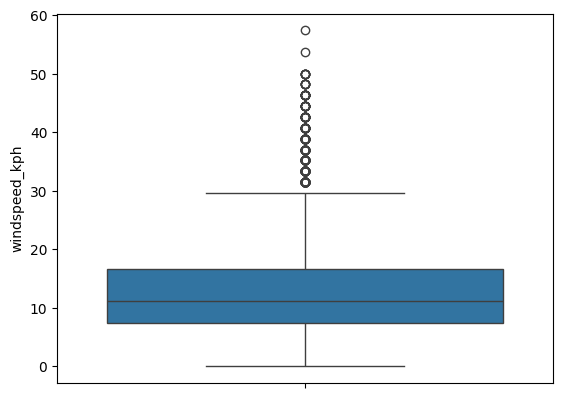

In [19]:
sns.boxplot(df['windspeed_kph']) #boxplot of wind speed 
plt.show()

The boxplot dysplays the outliers. 

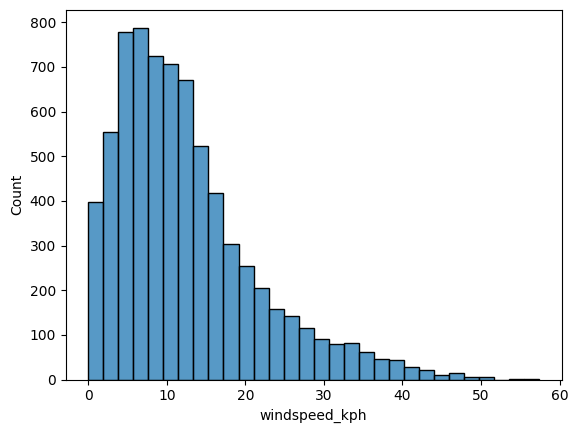

In [20]:
sns.histplot(df['windspeed_kph'], bins=30) #histogram of wind speed 
plt.show()

This distribution is **right-skewed**, meaning there are fewer instances of very high wind speeds, but they do exist. Essentially, the data shows that calmer winds are common. 
Given the distribution I will use the median to impute the missing values (even if I have just a few of them).

In [21]:
df['windspeed_kph'].fillna(df['windspeed_kph'].median(), inplace=True) #filling NaN values with mean of wind speed column

C:\Users\gsant\AppData\Local\Temp\ipykernel_26008\3540576551.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['windspeed_kph'].fillna(df['windspeed_kph'].median(), inplace=True) #filling NaN values with mean of wind speed column


# Now let's analyze visibility

In [22]:
df['visibility_km'].describe() #statistical summary of visibility in kilometers

count    7235.000000
mean    -5755.704962
std      4945.581345
min     -9999.000000
25%     -9999.000000
50%     -9999.000000
75%         8.000000
max        10.000000
Name: visibility_km, dtype: float64

In [23]:
round((df['visibility_km'] == -9999.0).sum() / df.shape[0] * 100, 2) # percentage of missing values in visibility column

57.6

### Visibility Analysis - High Missing Values (57.58%)

- Large number of placeholder values (-9999.0)
- Two potential approaches:
  * Drop column if correlation with bike lending is low: Visibility unlikely key factor in bike rental decisions
  * Impute values (risky with >50% missing data): Imputation could introduce more noise than value


In [24]:
df['visibility_km'] = df['visibility_km'].replace(-9999.0, np.nan) #replacing -9999.0 with NaN 
df['visibility_km'].isnull().sum() 

4167

In [25]:
df['visibility_km'].describe() #statistical summary of visibility in kilometers 

count    3068.000000
mean        7.597001
std         2.914620
min         0.100000
25%         5.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: visibility_km, dtype: float64

Values are ranging from 0.1 to 10 km. Most of the values are probably clustered around 10, as also the 75th percentile and the median are 10.

In [26]:
df['visibility_km'].value_counts(normalize=True).head() #value counts of visibility in kilometer

visibility_km
10.0    0.507823
8.0     0.107888
6.0     0.093546
5.0     0.060300
7.0     0.036832
Name: proportion, dtype: float64

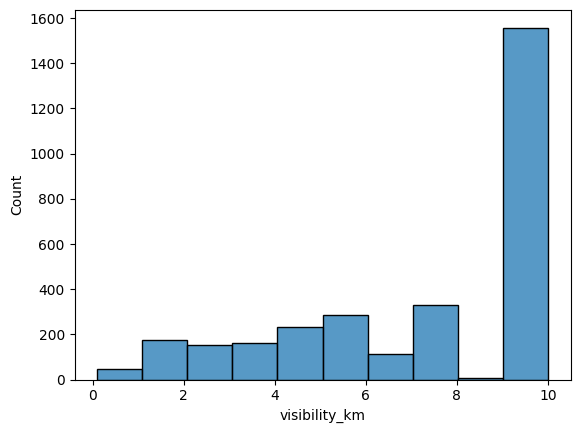

In [27]:
sns.histplot(df['visibility_km'], bins=10) #histogram of visibility
plt.show()

Most observations cluster around 10 km, which is the maximum measured visibility. The result is a **right-skewed distribution**

## Wind Chill Analysis

In [28]:
df['wind_chill_C'].describe() #statistical summary of wind chill in degrees Celsius

count    7235.000000
mean     -501.193932
std       499.435044
min      -999.000000
25%      -999.000000
50%      -999.000000
75%         0.000000
max         7.300000
Name: wind_chill_C, dtype: float64

In [29]:
(df['wind_chill_C'] == -999.0).sum()  

3629

In [30]:
round((df['wind_chill_C'] == -999.0).sum() / df.shape[0] * 100, 2) # percentage of placeholder values 

50.16

As for the visibility variable, wind chill has a high percentage of placeholder values, namely **50.15%**. The same consideration has to be done for this .

In [31]:
df['wind_chill_C'] = df['wind_chill_C'].replace(-999.0, np.nan) #replacing -999.0 with NaN

In [32]:
df['wind_chill_C'].describe() #statistical summary of wind chill 

count    3606.000000
mean       -0.212729
std         4.344348
min       -15.500000
25%        -3.400000
50%         0.000000
75%         3.500000
max         7.300000
Name: wind_chill_C, dtype: float64

 Wind chill is the perceived temperature on exposed skin due to wind, and it’s always at or below the actual air temperature in cold conditions. 
 

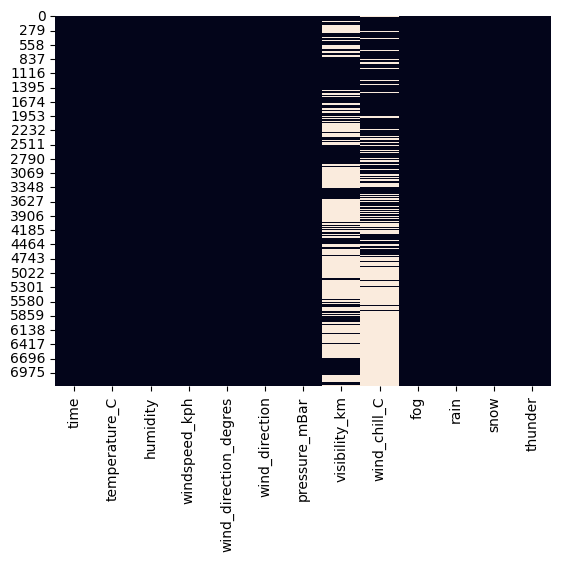

In [33]:
sns.heatmap(df.isna(), cbar=False)
plt.show()

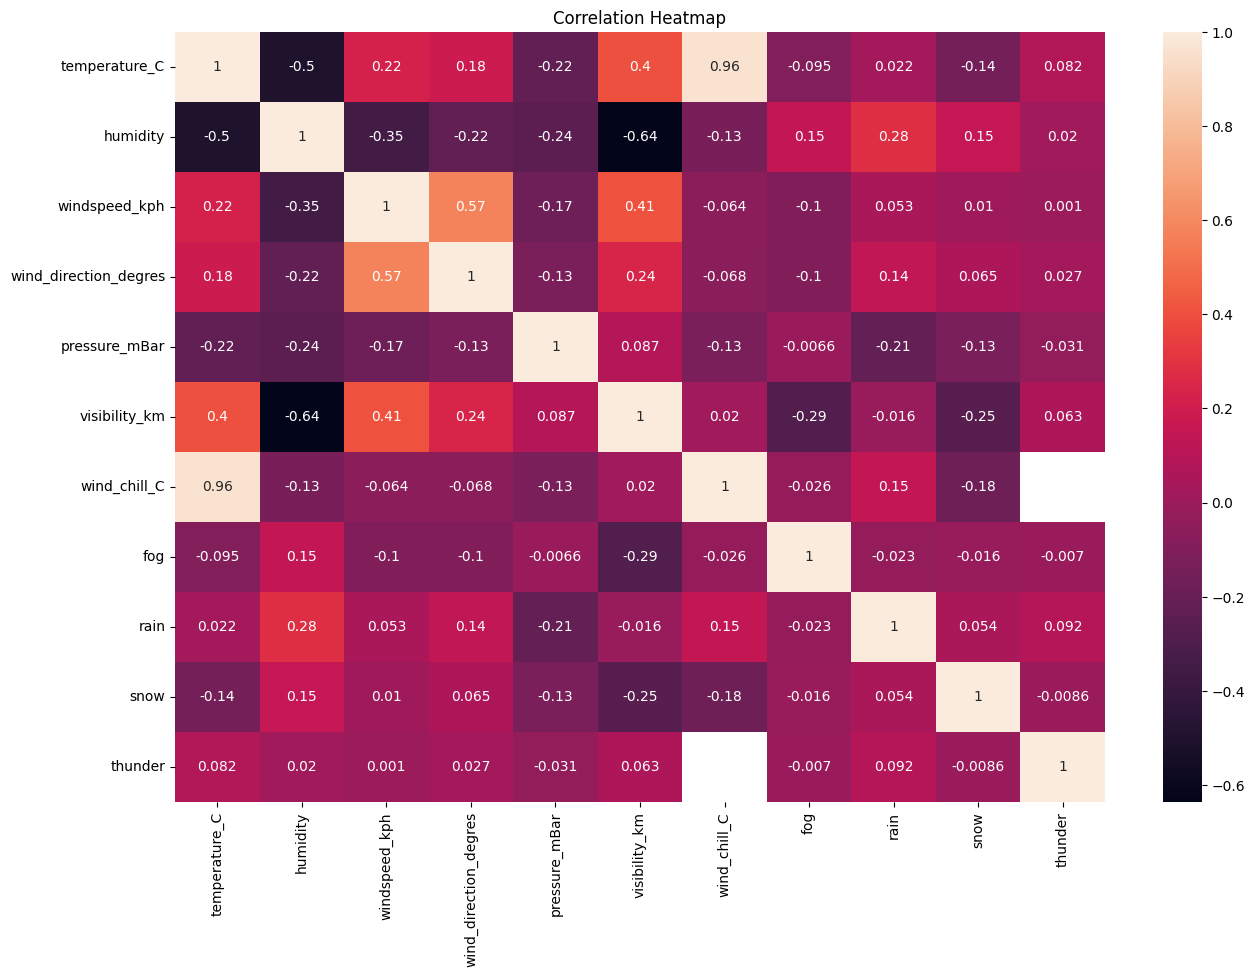

In [34]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot = True)
plt.title('Correlation Heatmap')
plt.show()

As one could expect, there is a high correlation of 0.96 between 'wind_chill_C' and 'temperature_C' indicating near-perfect linear correlation between these variables.

Including both will cause multicollinearity, negatively affecting statistical models (especially regression-based ones), by inflating variances and reducing interpretability. For this reason, and cosidering that the variable has a high percentage of missing values, We will drop the Wind Chill, as temperature alone with wind speed sufficiently capture the relevant weather effect.

For what concerns the visibility variable: 



In [35]:
df.columns

Index(['time', 'temperature_C', 'humidity', 'windspeed_kph',
       'wind_direction_degres', 'wind_direction', 'pressure_mBar',
       'visibility_km', 'wind_chill_C', 'fog', 'rain', 'snow', 'thunder'],
      dtype='object')

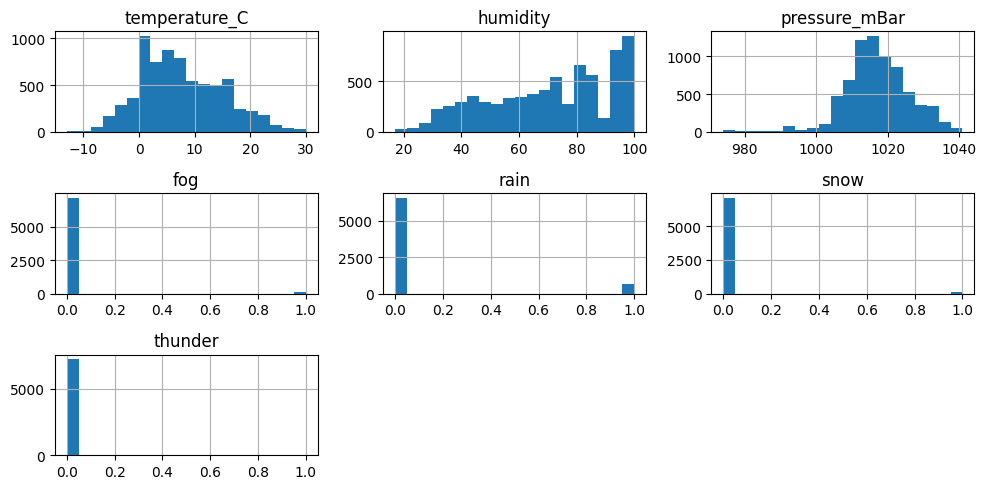

In [36]:
df.hist(column=['temperature_C', 'humidity', 'pressure_mBar', 'fog', 'rain', 'snow', 'thunder'], bins=20, figsize=(10, 5)) # histogram of all numerical columns
plt.tight_layout()
plt.show()

### Weather Variables Analysis (distribution ovewrview)

- **Binary Events**: Rare occurrences, with rain being most frequent
- **Temperature**: -10°C to 30°C (reasonalble for Budapest in the first half of the year)
- **Humidity**: 30-100%, peaks at 70-90% (moderate to high)
- **Pressure**: 1000-1040 mBar, centers around 1015-1020 mBar (normal range)

In [37]:
df['temperature_C'].describe() #statistical summary of temperature in degrees Celsius

count    7235.000000
mean        7.549274
std         7.402609
min       -13.000000
25%         2.000000
50%         7.000000
75%        13.000000
max        30.000000
Name: temperature_C, dtype: float64

# **Let's Create Temperature Buckets Based on Quartiles**

In [38]:
# Define temperature bins based on distribution and domain knowledge
def temp_bucket(temp):
    if temp < 0:
        return 'Very Cold'
    elif temp < 7:
        return 'Cold'
    elif temp < 13:
        return 'Mild'
    elif temp < 20:
        return 'Warm'
    else:
        return 'Hot'


# Apply bucket categorization
df['temperature_bin'] = df['temperature_C'].apply(temp_bucket)

In [39]:
def wnchill_bucket(wnchill):
    if wnchill < 0:
        return 'Very Cold'
    elif wnchill < 7:
        return 'Cold'
    elif wnchill < 13:
        return 'Mild'
    elif wnchill < 20:
        return 'Warm'
    else:
        return 'Hot'


In [40]:
df['wind_chill_bin'] = df['wind_chill_C'].apply(wnchill_bucket) #applying the same function to wind chill column

In [41]:
df[['temperature_bin', 'wind_chill_bin', 'temperature_C', 'wind_chill_C']].head(10) #checking the first 10 rows of the new columns

,temperature_bin,wind_chill_bin,temperature_C,wind_chill_C
0,Very Cold,Very Cold,-12.0,-15.5
1,Very Cold,Hot,-11.0,NaN
2,Very Cold,Hot,-10.0,NaN
3,Very Cold,Hot,-10.0,NaN
4,Very Cold,Hot,-9.0,NaN
5,Very Cold,Hot,-8.0,NaN
6,Very Cold,Very Cold,-7.0,-11.4
7,Very Cold,Very Cold,-7.0,-12.0
8,Very Cold,Very Cold,-7.0,-12.0
9,Very Cold,Very Cold,-7.0,-12.0


In [42]:
df['wind_chill_C'].head(10).apply(lambda x: (x, type(x)))


0    (-15.5, <class 'float'>)
1      (nan, <class 'float'>)
2      (nan, <class 'float'>)
3      (nan, <class 'float'>)
4      (nan, <class 'float'>)
5      (nan, <class 'float'>)
6    (-11.4, <class 'float'>)
7    (-12.0, <class 'float'>)
8    (-12.0, <class 'float'>)
9    (-12.0, <class 'float'>)
Name: wind_chill_C, dtype: object

In [43]:
print(df.dtypes)

time                     datetime64[ns]
temperature_C                   float64
humidity                          int64
windspeed_kph                   float64
wind_direction_degres             int64
wind_direction                   object
pressure_mBar                     int64
visibility_km                   float64
wind_chill_C                    float64
fog                               int64
rain                              int64
snow                              int64
thunder                           int64
temperature_bin                  object
wind_chill_bin                   object
dtype: object


In [44]:
df['temperature_bin'].value_counts(normalize=True) #value counts of temperature bins

temperature_bin
Cold         0.365999
Mild         0.253766
Warm         0.180788
Very Cold    0.123704
Hot          0.075743
Name: proportion, dtype: float64

C:\Users\gsant\AppData\Local\Temp\ipykernel_26008\567836716.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='temperature_bin', data=df, palette='dark') #count plot of temperature bins


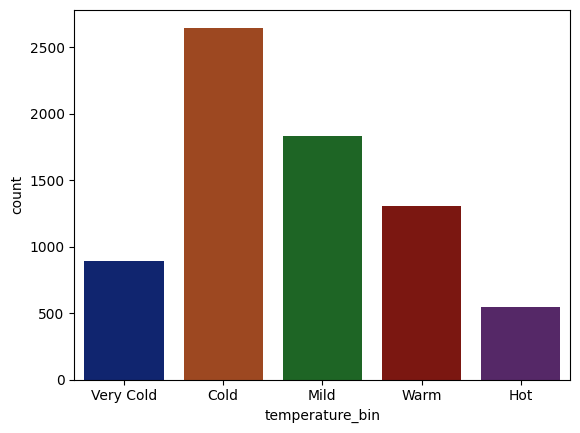

In [45]:
sns.countplot(x='temperature_bin', data=df, palette='dark') #count plot of temperature bins
plt.show()

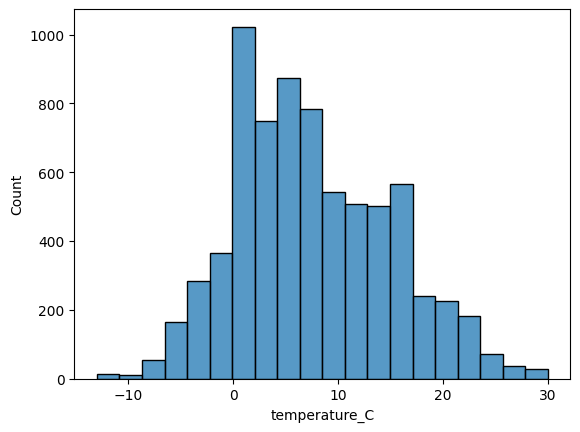

In [46]:
sns.histplot(df['temperature_C'], bins=20) # histogram of temperature
plt.show()

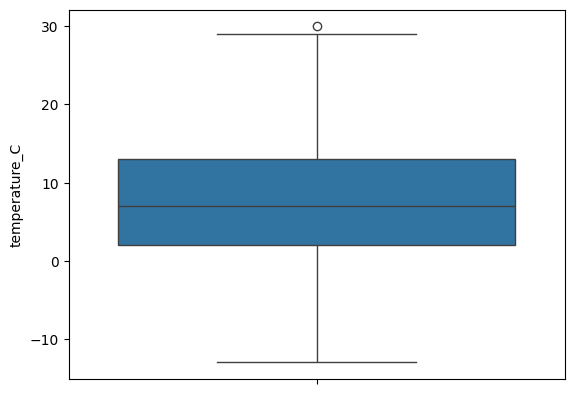

In [47]:
sns.boxplot(df['temperature_C']) # boxplot of temperature   
plt.show()

**Defining a function to detect outliers with the IQR method**

In [48]:
def detect_outliers(df, column): 
	'''Defines a function to detect outliers in a given column of a DataFrame using the IQR method'''    
	Q1 = df[column].quantile(0.25) 
	Q3 = df[column].quantile(0.75) 
	IQR = Q3 - Q1 
	lower_bound = Q1 - 1.5 * IQR 
	upper_bound = Q3 + 1.5 * IQR 
	outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)] 
	return outliers 


In [49]:
detect_outliers(df, 'temperature_C').shape[0] # number of outliers in temperature column

1

In [50]:
detect_outliers(df, 'temperature_C') #detecting outliers in temperature column

,time,temperature_C,humidity,windspeed_kph,wind_direction_degres,wind_direction,pressure_mBar,visibility_km,wind_chill_C,fog,rain,snow,thunder,temperature_bin,wind_chill_bin
6644,2015-05-19 15:30:00,30.0,33,16.7,180,South,1008,NaN,NaN,0,0,0,0,Hot,Hot


**Humidity**

In [51]:
df['humidity'].describe() #statistical summary of humidity

count    7235.000000
mean       70.886662
std        21.546290
min        17.000000
25%        54.000000
50%        74.000000
75%        88.000000
max       100.000000
Name: humidity, dtype: float64

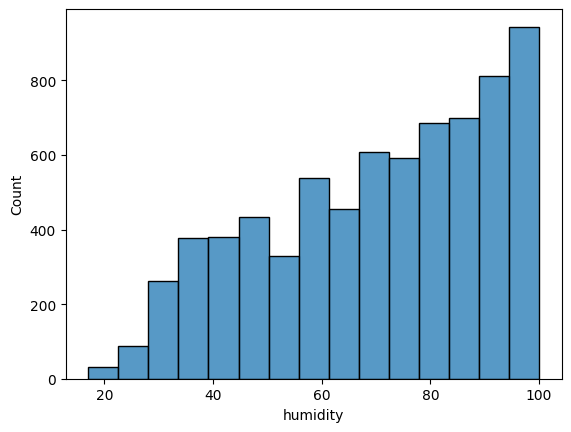

In [52]:
sns.histplot(df['humidity'], bins=15) # histogram of humidity
plt.show()

The distribution is **left-skewed**, meaning most of the observations lie toward the higher end of the humidity range.
igher humidity values (80–100%) occur most frequently, and lower humidity values (below 40%) are relatively rare.

In [53]:
detect_outliers(df, 'humidity').shape[0] #counting the number of outliers in humidity column

0

In [54]:
#Defining bin edges and labels
bins = [0, 54, 74, 88, 101]
labels = ['Low', 'Moderate', 'High', 'Very High']

#Creating a binned column based on humidity
df['humidity_bin'] = pd.cut(df['humidity'], bins=bins, labels=labels, right=False)  # right=False means the right edge is exclusive

cat_type = pd.CategoricalDtype(categories=labels, ordered=True)
df['humidity_bin'] = df['humidity_bin'].astype(cat_type)

C:\Users\gsant\AppData\Local\Temp\ipykernel_26008\2818743589.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='humidity_bin', data=df, palette='dark') #count plot of humidity bins


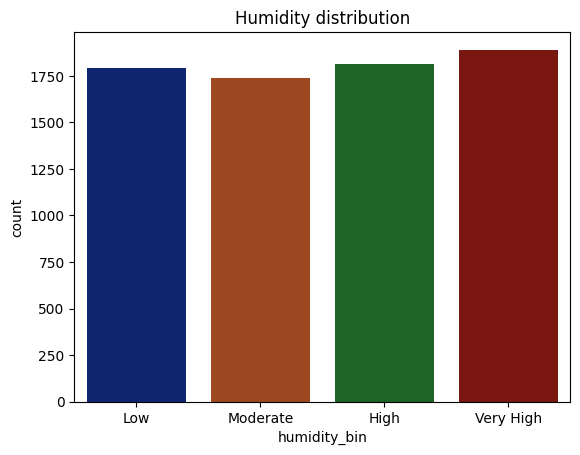

In [55]:
sns.countplot(x='humidity_bin', data=df, palette='dark') #count plot of humidity bins
plt.title('Humidity distribution')
plt.show()

In [56]:
df['visibility_km'] = df['visibility_km'].fillna(df.groupby('humidity_bin')['visibility_km'].transform('mean'))  # filling NaN values with mean of visibility column grouped by humidity_bin

C:\Users\gsant\AppData\Local\Temp\ipykernel_26008\3528371147.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['visibility_km'] = df['visibility_km'].fillna(df.groupby('humidity_bin')['visibility_km'].transform('mean'))  # filling NaN values with mean of visibility column grouped by humidity_bin


In [57]:
df['visibility_km'].isnull().sum() #checking for null values in visibility column

0

**Pressure**

In [58]:
df['pressure_mBar'].describe() #statistical summary of pressure 

count    7235.000000
mean     1016.966551
std         9.123351
min       974.000000
25%      1012.000000
50%      1017.000000
75%      1023.000000
max      1041.000000
Name: pressure_mBar, dtype: float64

In [59]:
detect_outliers(df, 'pressure_mBar').shape[0] #detecting outliers in pressure column 

180

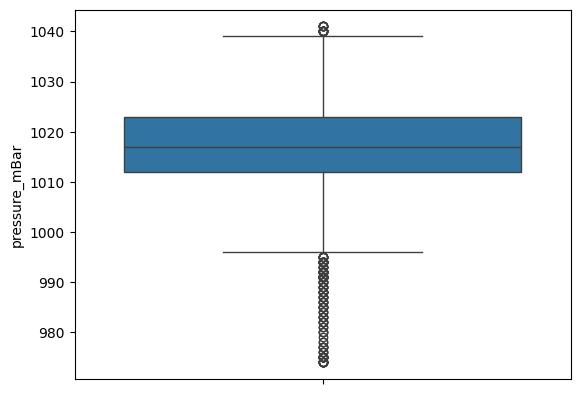

In [60]:
sns.boxplot(df['pressure_mBar']) #boxenplot of pressure
plt.show()

As we have 180 outliers, we migh want to know if these are extreme but valid values reflecting real atmospheric conditions and not measurement errors.
Winsorizing: Replace extreme values with a percentile cap (e.g., 1st and 99th percentiles). This preserves the data’s overall distribution but limits extreme tail values.

Log Transform: Sometimes a log transform can reduce the impact of outliers if the variable is strictly positive.

In [61]:
detect_outliers(df, 'windspeed_kph').shape[0] #detecting outliers in wind speed column

402

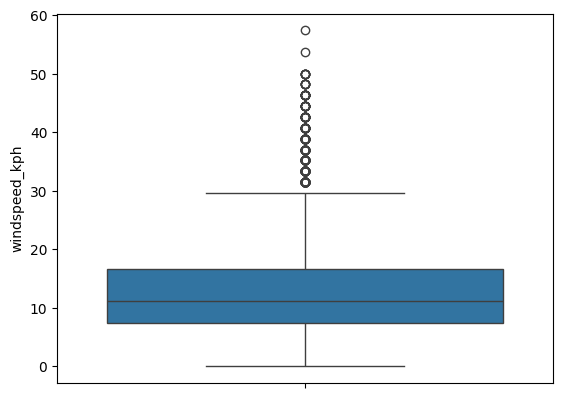

In [62]:
sns.boxplot(df['windspeed_kph']) #boxenplot of wind speed
plt.show()

In [63]:
detect_outliers(df, 'visibility_km').shape[0] #detecting outliers in visibility column 

586

In [64]:
df.reset_index(inplace=True)  # Reset the index to bring 'time' back as a column
df['hour'] = df['time'].dt.hour  # Extracting hour from time column

In [65]:
def time_of_day(hour):
    '''Segments the hour into different times of the day
       Morning: 5-12, Afternoon: 12-17, Evening: 17-21, Night: 21-5'''
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    elif 21 <= hour < 24:
        return 'Night'
    else:
        return 'LateNight'

df['time_of_day'] = df['hour'].apply(time_of_day)
df['time_of_day'].value_counts(normalize=True) #value counts of time segments

time_of_day
Morning      0.291914
Afternoon    0.208431
LateNight    0.208017
Evening      0.166413
Night        0.125225
Name: proportion, dtype: float64

**SETTING TIME AS INDEX**

In [66]:
df.set_index('time', inplace=True) #setting time as index
df.head()

,index,temperature_C,humidity,windspeed_kph,wind_direction_degres,wind_direction,pressure_mBar,visibility_km,wind_chill_C,fog,rain,snow,thunder,temperature_bin,wind_chill_bin,humidity_bin,hour,time_of_day
time,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,0,-12.0,85,5.6,0,Variable,1037,5.0,-15.5,0,0,0,0,Very Cold,Very Cold,High,0,LateNight
2015-01-01 00:30:00,1,-11.0,85,3.7,0,Variable,1036,4.0,NaN,0,0,0,0,Very Cold,Hot,High,0,LateNight
2015-01-01 01:00:00,2,-10.0,86,3.7,0,Variable,1036,4.0,NaN,0,0,0,0,Very Cold,Hot,High,1,LateNight
2015-01-01 01:30:00,3,-10.0,86,0.0,0,North,1036,5.0,NaN,0,0,0,0,Very Cold,Hot,High,1,LateNight
2015-01-01 02:00:00,4,-9.0,79,0.0,0,North,1036,4.0,NaN,0,0,0,0,Very Cold,Hot,High,2,LateNight


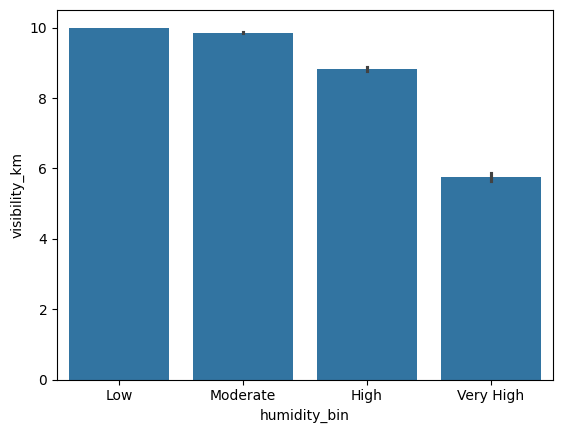

In [67]:
sns.barplot(data=df, x='humidity_bin', y='visibility_km') #bar plot of humidity bins vs visibility
plt.show()

As humidity increases, visibility decreases. The effect is particularly strong with very high levels of humidity. This aligns with meteorological intuition that higher moisture in the air (e.g., fog, haze) reduces how far one can see.

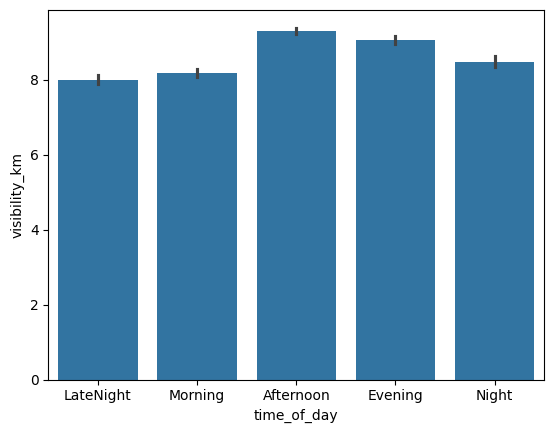

In [68]:
sns.barplot(data=df, x='time_of_day', y='visibility_km') #bar plot of time of day vs visibility
plt.show()

Time of Day also matters: Visibility typically peaks in the afternoon and dips in the morning and night.

In [69]:
df.head(10)

,index,temperature_C,humidity,windspeed_kph,wind_direction_degres,wind_direction,pressure_mBar,visibility_km,wind_chill_C,fog,rain,snow,thunder,temperature_bin,wind_chill_bin,humidity_bin,hour,time_of_day
time,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,0,-12.0,85,5.6,0,Variable,1037,5.0,-15.5,0,0,0,0,Very Cold,Very Cold,High,0,LateNight
2015-01-01 00:30:00,1,-11.0,85,3.7,0,Variable,1036,4.0,NaN,0,0,0,0,Very Cold,Hot,High,0,LateNight
2015-01-01 01:00:00,2,-10.0,86,3.7,0,Variable,1036,4.0,NaN,0,0,0,0,Very Cold,Hot,High,1,LateNight
2015-01-01 01:30:00,3,-10.0,86,0.0,0,North,1036,5.0,NaN,0,0,0,0,Very Cold,Hot,High,1,LateNight
2015-01-01 02:00:00,4,-9.0,79,0.0,0,North,1036,4.0,NaN,0,0,0,0,Very Cold,Hot,High,2,LateNight
2015-01-01 02:30:00,5,-8.0,79,3.7,0,Variable,1036,4.0,NaN,0,0,0,0,Very Cold,Hot,High,2,LateNight
2015-01-01 03:00:00,6,-7.0,74,9.3,230,SW,1036,5.0,-11.4,0,0,0,0,Very Cold,Very Cold,High,3,LateNight
2015-01-01 03:30:00,7,-7.0,74,11.1,250,WSW,1036,6.0,-12.0,0,0,0,0,Very Cold,Very Cold,High,3,LateNight
2015-01-01 04:00:00,8,-7.0,74,11.1,240,WSW,1035,6.0,-12.0,0,0,0,0,Very Cold,Very Cold,High,4,LateNight


In [70]:
import calendar

# Extract the month from the DatetimeIndex and create a new column 'month'
df['month'] = df.index.month

# Convert the month number to its abbreviated name
df['month_str'] = df['month'].apply(lambda x: calendar.month_abbr[x])

In [71]:
weather_df = df.copy() #creating a copy of the dataframe
weather_df.reset_index(inplace=True) #resetting the index of the dataframe
weather_df.head() #first 5 rows of the dataframe

,time,index,temperature_C,humidity,windspeed_kph,wind_direction_degres,wind_direction,pressure_mBar,visibility_km,wind_chill_C,...,rain,snow,thunder,temperature_bin,wind_chill_bin,humidity_bin,hour,time_of_day,month,month_str
0,2015-01-01 00:00:00,0,-12.0,85,5.6,0,Variable,1037,5.0,-15.5,...,0,0,0,Very Cold,Very Cold,High,0,LateNight,1,Jan
1,2015-01-01 00:30:00,1,-11.0,85,3.7,0,Variable,1036,4.0,NaN,...,0,0,0,Very Cold,Hot,High,0,LateNight,1,Jan
2,2015-01-01 01:00:00,2,-10.0,86,3.7,0,Variable,1036,4.0,NaN,...,0,0,0,Very Cold,Hot,High,1,LateNight,1,Jan
3,2015-01-01 01:30:00,3,-10.0,86,0.0,0,North,1036,5.0,NaN,...,0,0,0,Very Cold,Hot,High,1,LateNight,1,Jan
4,2015-01-01 02:00:00,4,-9.0,79,0.0,0,North,1036,4.0,NaN,...,0,0,0,Very Cold,Hot,High,2,LateNight,1,Jan


Given the binary variables distribution, we know these are relatively rare events. we can combine these rare binary weather indicators into a single composite variable to improve sample sizes and provide a clearer picture of how severe weather conditions influence bike trips.

In [72]:
#creating baweather_d weather anweather_d severe weather columns    
weather_df['bad_weather'] = ((weather_df['rain'] == 1) | (weather_df['fog'] == 1)).astype(int)
# Create a composite severe weather inweather_dicator
weather_df['severe_weather'] = (
    ((weather_df['snow'] == 1) | (weather_df['thunder'] == 1)) | 
    ((weather_df['rain'] + weather_df['fog'] + weather_df['snow'] + weather_df['thunder']) > 1)
).astype(int)

weather_df['bad_weather'].value_counts(normalize=True) #value counts of severe weather column

bad_weather
0    0.898134
1    0.101866
Name: proportion, dtype: float64

In [73]:
weather_df['severe_weather'].value_counts(normalize=True) #value counts of bad weather column

severe_weather
0    0.976503
1    0.023497
Name: proportion, dtype: float64

In [74]:
#saving the cleaned dataframe to a csv file
weather_df.to_csv('cleaned_weather_data.csv', index=False)  

In [75]:
weather_df['visibility_km'].isnull().sum() #checking for null values in visibility column

0